In [1]:
import pyfiles.HFSAnalyzer as HFSA

import os
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
from imp import reload
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
import matplotlib.gridspec as gridspec

pwd = os.getcwd()

In [126]:
sns.set_context('paper')
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

alpha = 0.9   # Change from RGB colors to RGBA with this alpha value
mycolors = np.asarray(sns.color_palette())
zeros = alpha * np.ones(len(mycolors))
mycolors = np.hstack([mycolors, zeros[:, None]])


rc['text.usetex'] = True
rc['font.size'] = 30
rc['figure.figsize'] = (5, 5)
rc['savefig.format'] = 'pdf'
rc['savefig.transparent'] = True
rc['savefig.bbox'] = 'tight'
rc['savefig.directory'] = os.chdir(pwd + '/../doc/images')

In [3]:
# load and scrub data
workdir = '/home/evan/git/HF-Stability/analysis/'
df =  HFSA.json_dir_to_df(workdir + 'log')

df.dropna(axis='rows', subset=['NDIM', 'rs', 'Nk', 'mycase', 'dav_min_eval'], inplace=True)
df['Nk'] = df['Nk'].astype(int)
df['NDIM'] = df['NDIM'].astype(int)
df['mycase'] = df['mycase'].astype(str)

In [4]:
# Split into groups
def dict_subview(dic, keys):
    return {key : val for (key, val) in dic.items() if key in keys}

data = {
     'all'   : df
    ,'3D'    : df[df['NDIM'] == 3]
    ,'2D'    : df[df['NDIM'] == 2]
    ,'3Drs12': df[np.isclose(df['rs'].as_matrix(), 1.2) & (df['NDIM'] == 3)]
    ,'2Drs12': df[np.isclose(df['rs'].as_matrix(), 1.2) & (df['NDIM'] == 2)]
    ,'3DR2U' : df[((df.mycase.str.contains('cRHF2cUHF')) & (df['NDIM'] == 3))]
    ,'3DR2G' : df[((df.mycase.str.contains('cRHF2cGHF')) & (df['NDIM'] == 3))]
    ,'3DU2U' : df[((df.mycase.str.contains('cUHF2cUHF')) & (df['NDIM'] == 3))]

    ,'2DR2U' : df[((df.mycase.str.contains('cRHF2cUHF')) & (df['NDIM'] == 2))]
    ,'2DR2G' : df[((df.mycase.str.contains('cRHF2cGHF')) & (df['NDIM'] == 2))]
    ,'2DU2U' : df[((df.mycase.str.contains('cUHF2cUHF')) & (df['NDIM'] == 2))]
}

# remove emptys
data = {key: val for (key, val) in data.items() if len(val) > 0}

In [5]:
# Matplotlib defaults
plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.format'] = 'eps'

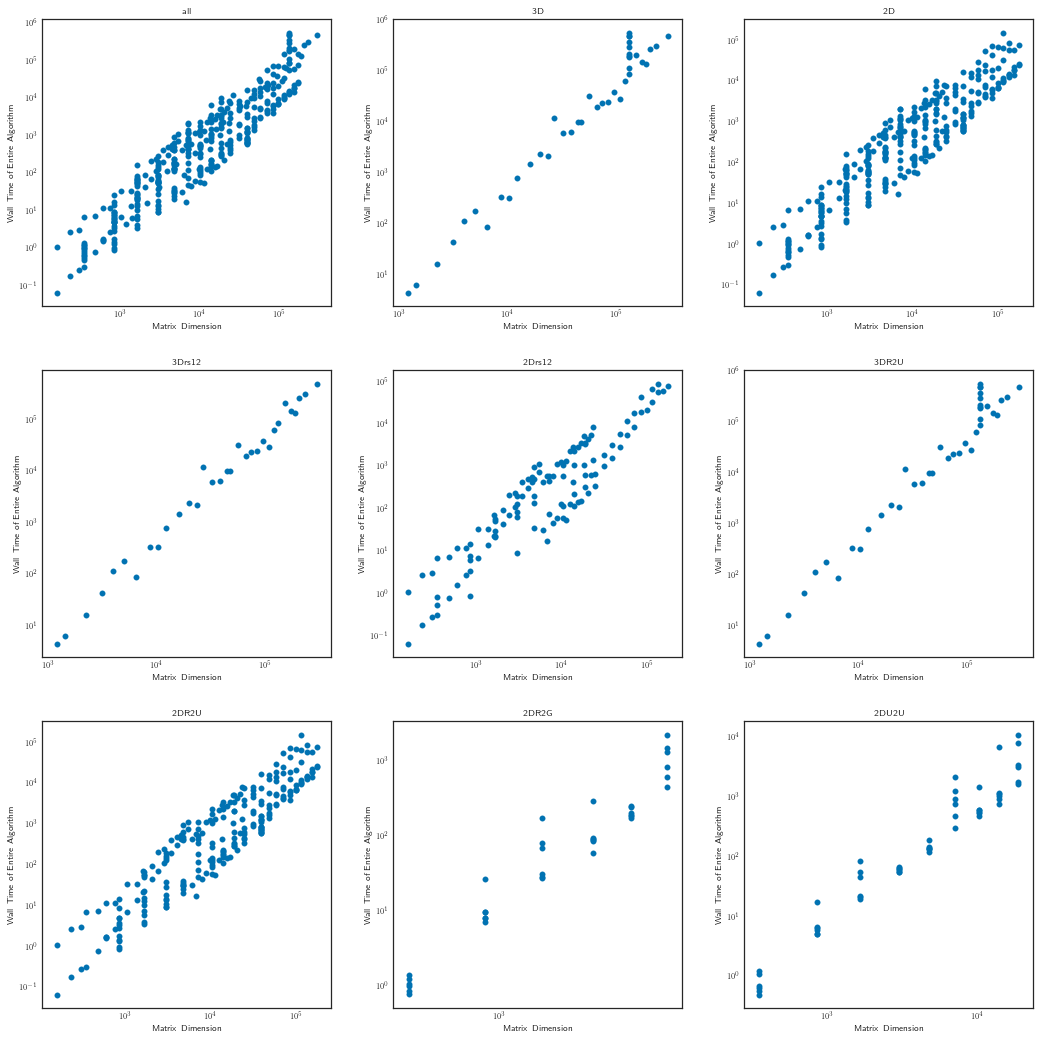

In [6]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_runtime)
plt.tight_layout()
plt.show()

/home/evan/git/HF-Stability/analysis/pyfiles/HFSAnalyzer.py:423: RuntimeWarning: divide by zero encountered in log10
  c = np.polyfit(np.log10(Nmatfull)[-10:], np.log10(fulltimes)[-10:], 1)


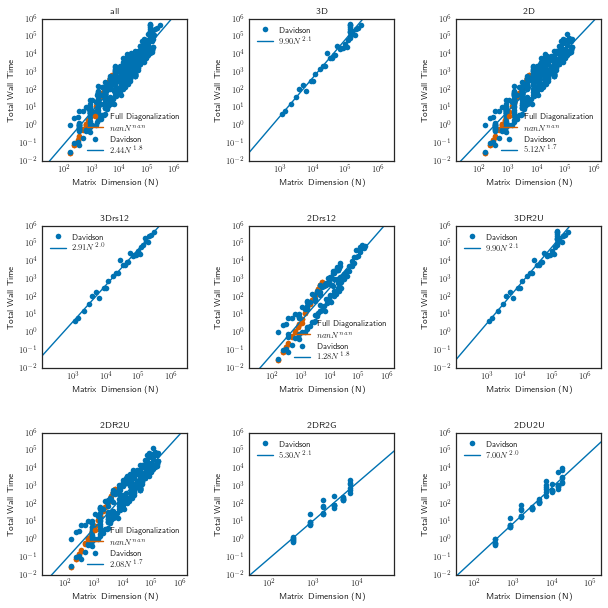

In [7]:
fig = plt.figure(figsize=(9, 9))
HFSA.subplotByDfDict(data, fig, HFSA.plot_diag_scaling)
plt.tight_layout()
plt.show()

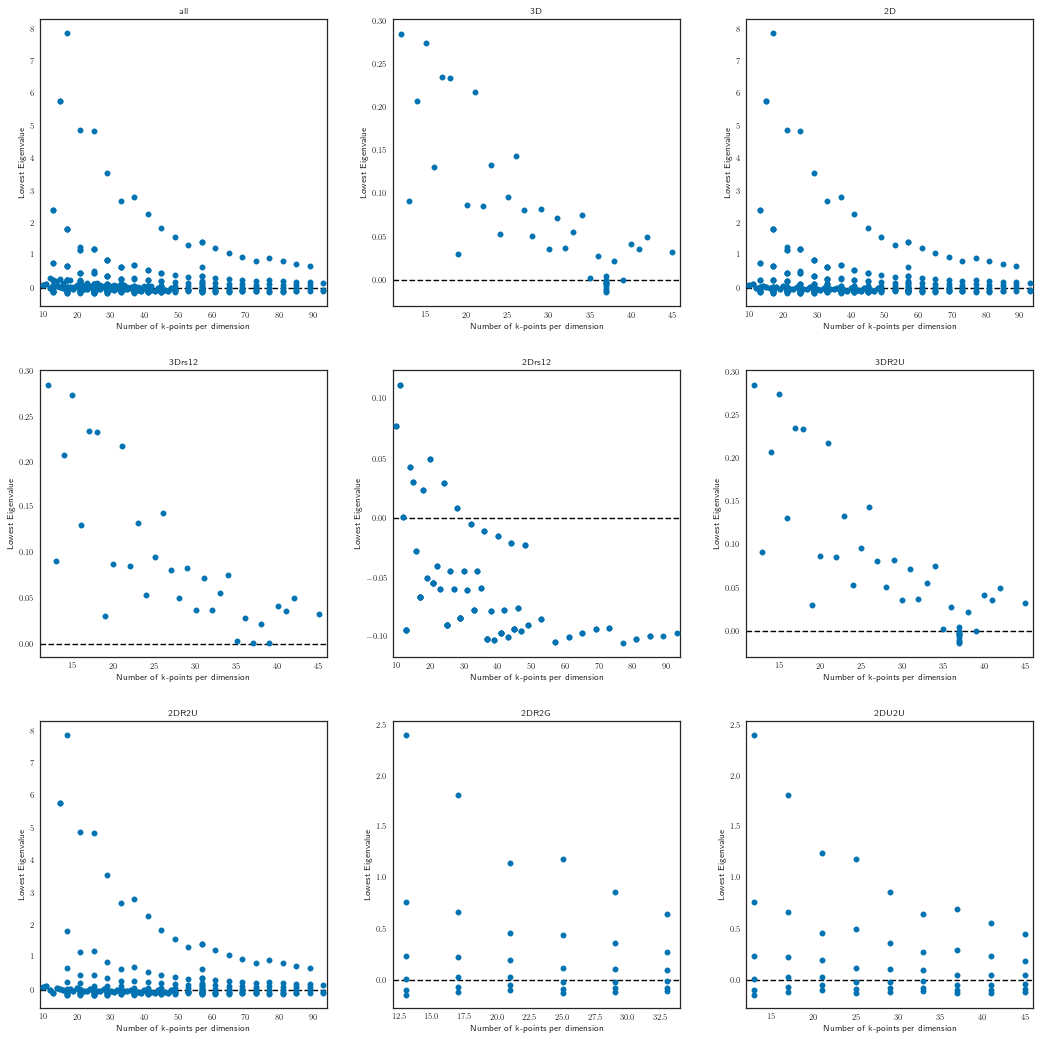

In [8]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_dav_vs_full)
plt.tight_layout()
plt.show()

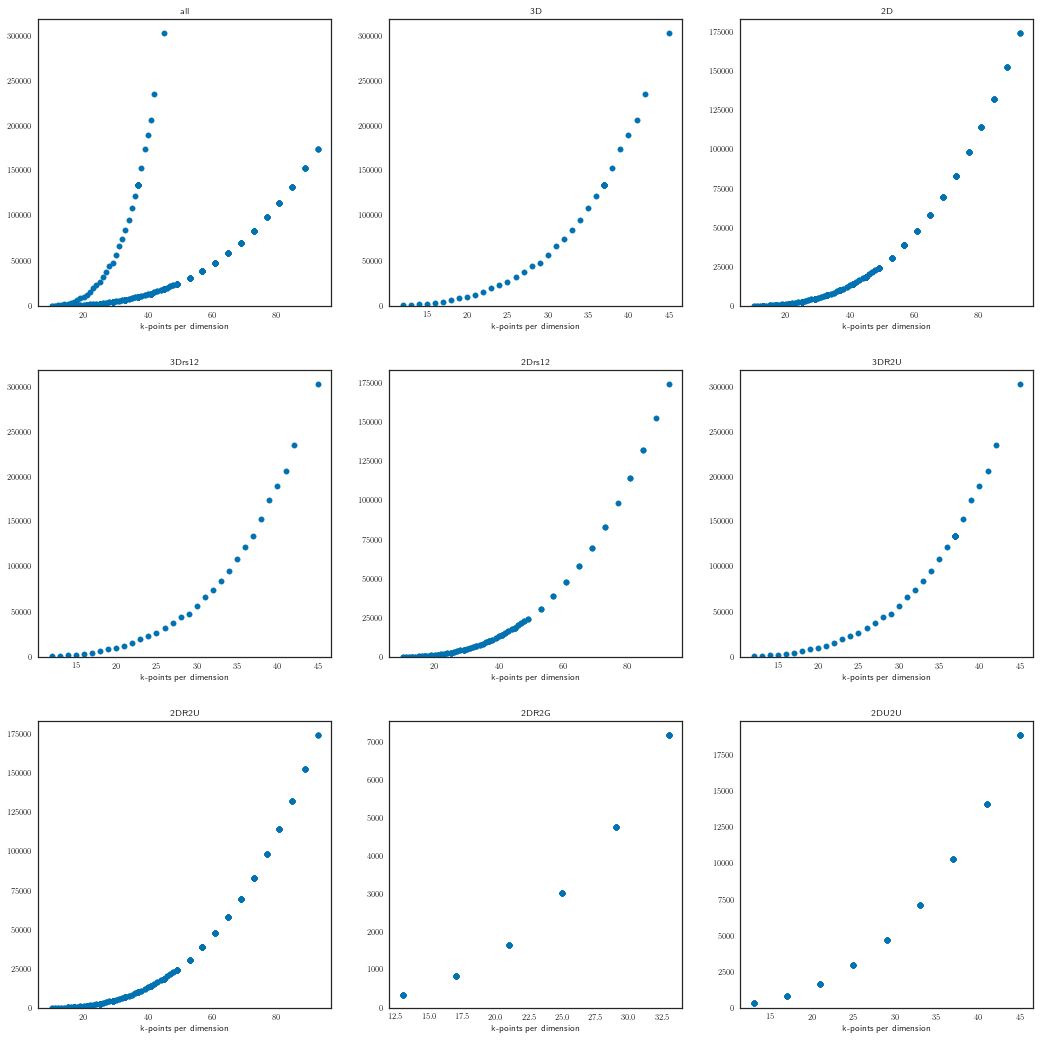

In [9]:
fig = plt.figure(figsize=(15,15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_matrix_scaling)
plt.tight_layout()
plt.show()

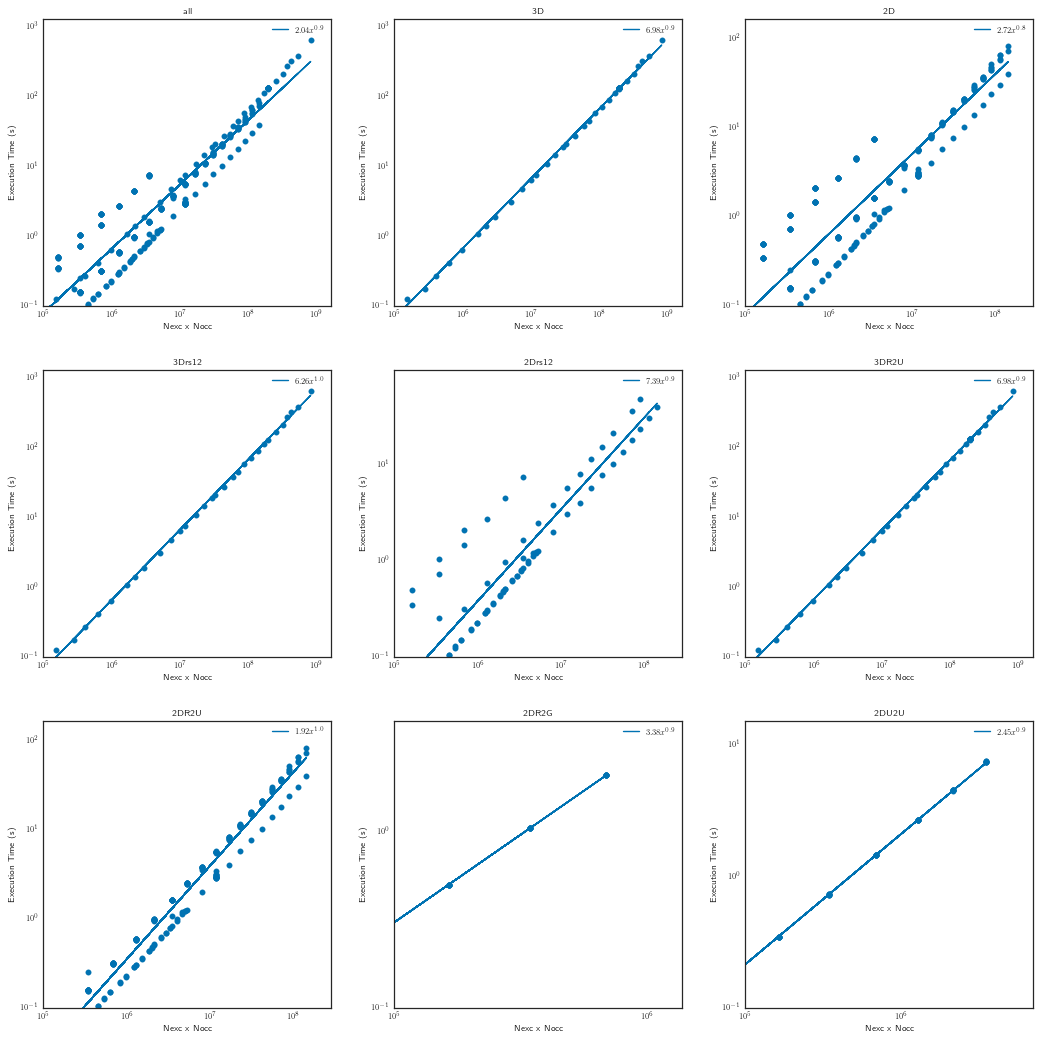

In [10]:
fig = plt.figure(figsize=(15, 15))
HFSA.subplotByDfDict(data, fig, HFSA.plot_mvproduct_scaling)
plt.tight_layout()
plt.show()

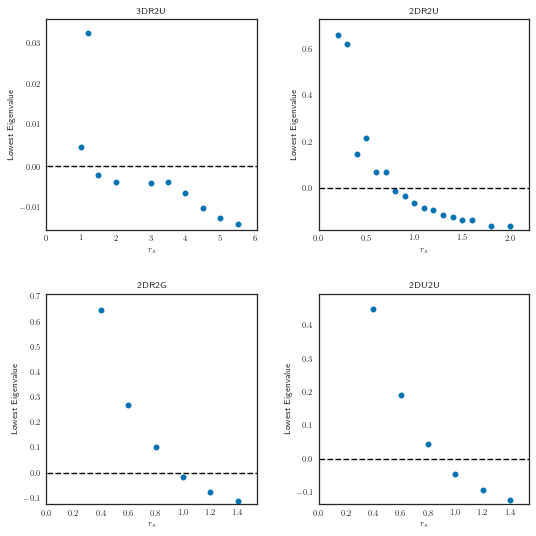

In [11]:
fig = plt.figure(figsize=(8, 8))

subview = dict_subview(data, ['2DR2U', '2DU2U', '2DR2G', '3DR2U'])
new_data = {key : HFSA.only_max(df, 'Nk', 'rs') for (key, df) in subview.items()}

HFSA.subplotByDfDict(new_data, fig, HFSA.plot_stability)
plt.tight_layout()
plt.show()

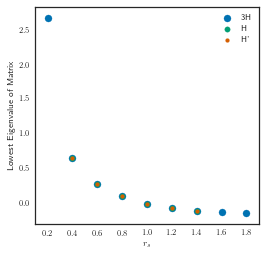

In [15]:
r2u = data['2DR2U'][data['2DR2U']['Nk'] == 33].sort_values(by='rs')
r2g = data['2DR2G'][data['2DR2G']['Nk'] == 33].sort_values(by='rs')
u2u = data['2DU2U'][data['2DU2U']['Nk'] == 33].sort_values(by='rs')

fig = plt.figure(figsize=(4, 4))
plt.scatter(r2u['rs'], r2u['dav_min_eval'], label="3H", s=50)
plt.scatter(r2g['rs'], r2g['dav_min_eval'], label='H', s=30)
plt.scatter(u2u['rs'], u2u['dav_min_eval'], label="H'", s=15)
plt.legend()
plt.ylabel('Lowest Eigenvalue of Matrix')
plt.xlabel('$r_s$')
plt.savefig('Matrix_Compare.pdf')
plt.show()

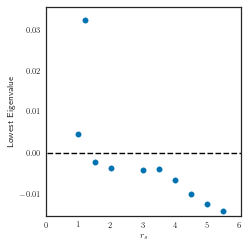

In [13]:
fig = plt.figure(figsize=(4, 4))
HFSA.plot_stability(HFSA.only_max(data['3DR2U'], 'Nk', 'rs'), fig.gca())
plt.tight_layout()
plt.show()

In [16]:
# load and scrub data
workdir = '/home/evan/git/HF-Stability/analysis/'
df =  HFSA.json_dir_to_df(workdir)

df.dropna(axis='rows', subset=['NDIM', 'rs', 'Nk', 'mycase', 'dav_min_eval'], inplace=True)
df['Nk'] = df['Nk'].astype(int)
df['NDIM'] = df['NDIM'].astype(int)
df['mycase'] = df['mycase'].astype(str)

In [21]:
evaldic = {df['mycase'].iloc[i] : df['exact_evals'].iloc[i] for i in range(len(df))}

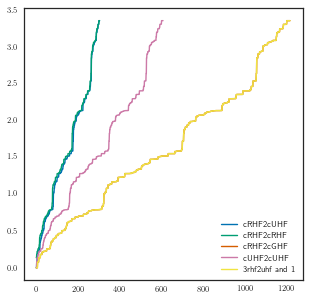

In [37]:
fig = plt.figure()
for key, val in evaldic.items():
    plt.plot(range(len(val)), val, label=key)
    

sort = np.sort(np.concatenate([ evaldic['cRHF2cRHF']
                               ,evaldic['cRHF2cUHF']
                               ,evaldic['cRHF2cUHF']
                               ,evaldic['cRHF2cUHF'] ]))
plt.plot(range(len(sort)), sort, label='3rhf2uhf and 1')
plt.legend()
plt.show()

In [39]:
print(np.all(np.abs(sort - evaldic['cRHF2cGHF']) < 1e-10))

True


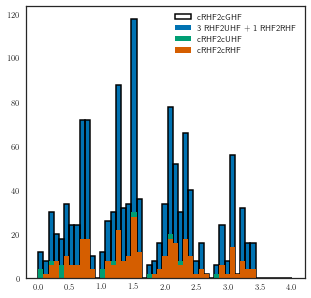

In [112]:
# the histogram of the data
plt.figure()

xmin, xmax = (0, 4)
binset = np.linspace(xmin, xmax, 50)
plt.hist(evaldic['cRHF2cGHF'], bins=binset, histtype='bar', stacked=True, label='cRHF2cGHF', fill=False, color='r'
        , linewidth=1.5, zorder=1)
plt.hist(sort, bins=binset, histtype='bar', stacked=True, label='3 RHF2UHF + 1 RHF2RHF', zorder=0)

plt.hist(evaldic['cRHF2cUHF'], bins=binset, histtype='bar', stacked=True, label='cRHF2cUHF')
plt.hist(evaldic['cRHF2cRHF'], bins=binset, histtype='bar', stacked=True, label='cRHF2cRHF')
plt.legend()
plt.show()

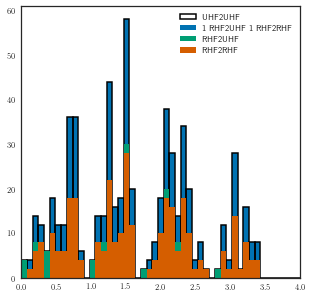

In [113]:
# the histogram of the data
plt.figure()
xmin, xmax = (0, 4)
binset = np.linspace(xmin, xmax, 50)
plt.hist(evaldic['cUHF2cUHF'], bins=binset, histtype='bar', stacked=True, 
         label='UHF2UHF', fill=False, linewidth=1.5, zorder=1)
plt.hist(np.concatenate([evaldic['cRHF2cUHF'], evaldic['cRHF2cRHF']]), 
         bins=binset, histtype='bar', stacked=True, label='1 RHF2UHF 1 RHF2RHF', 
         color=sns.color_palette()[0], zorder=0)

plt.hist(evaldic['cRHF2cUHF'], bins=binset, histtype='bar', stacked=True, label='RHF2UHF', color=sns.color_palette()[1])
plt.hist(evaldic['cRHF2cRHF'], bins=binset, histtype='bar', stacked=True, label='RHF2RHF', color=sns.color_palette()[2])


plt.xlim(xmin, xmax)
plt.legend()
plt.show()

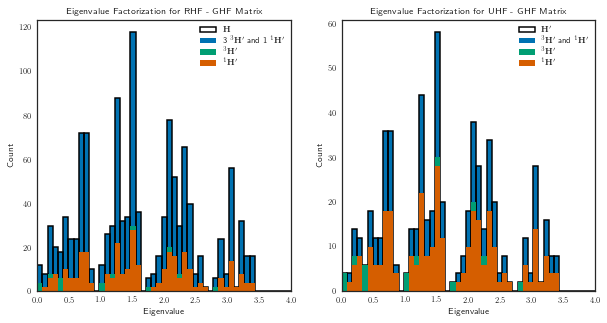

In [138]:
# the histogram of the data

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
xmin, xmax = (0, 4)
binset = np.linspace(xmin, xmax, 50)
ax1.hist(evaldic['cRHF2cGHF'], bins=binset, histtype='bar', stacked=True, label="$\mathbf{H}$", fill=False, color='r'
        , linewidth=1.5, zorder=1)
ax1.hist(sort, bins=binset, histtype='bar', stacked=True, label="3 ${}^3\mathbf{H}'$ and 1 ${}^1\mathbf{H}'$", zorder=0)

ax1.hist(evaldic['cRHF2cUHF'], bins=binset, histtype='bar', stacked=True, label="${}^3\mathbf{H}'$")
ax1.hist(evaldic['cRHF2cRHF'], bins=binset, histtype='bar', stacked=True, label="${}^1\mathbf{H}'$")
ax1.set_title('Eigenvalue Factorization for RHF - GHF Matrix')
ax1.legend()
ax1.set_xlabel('Eigenvalue')
ax1.set_ylabel('Count')
ax1.set_xlim(xmin, xmax)

xmin, xmax = (0, 4)
binset = np.linspace(xmin, xmax, 50)
ax2.hist(evaldic['cUHF2cUHF'], bins=binset, histtype='bar', stacked=True, 
         label="$\mathbf{H}'$", fill=False, linewidth=1.5, zorder=1)
ax2.hist(np.concatenate([evaldic['cRHF2cUHF'], evaldic['cRHF2cRHF']]), 
         bins=binset, histtype='bar', stacked=True, label="${}^3\mathbf{H}'$ and ${}^1\mathbf{H}'$", 
         color=sns.color_palette()[0], zorder=0)

ax2.hist(evaldic['cRHF2cUHF'], bins=binset, histtype='bar', stacked=True, label="${}^3\mathbf{H}'$", color=sns.color_palette()[1])
ax2.hist(evaldic['cRHF2cRHF'], bins=binset, histtype='bar', stacked=True, label="${}^1\mathbf{H}'$", color=sns.color_palette()[2])
ax2.set_xlim(xmin, xmax)
ax2.set_title('Eigenvalue Factorization for UHF - GHF Matrix')
ax2.legend()
ax2.set_xlabel('Eigenvalue')
ax2.set_ylabel('Count')
plt.savefig('matrix_factor_histograms.pdf')
plt.show()